# Face Recognition using CNN

 # Step1:
 
At the first, you should input the required libraries:

In [ ]:
#importing the libraries 
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with data visualization
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

# Step2:

* Load Dataset :

After loading the Dataset you have to normalize every image.

Note: an image is a Uint8 matrix of pixels and for calculation, you need to convert the format of the image to float or double

In [ ]:
#load dataset
data = np.load('ORL_faces.npz') 

# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

# Step 3

Split DataSet : Validation data and Train 

Validation DataSet: this data set is used to minimize overfitting.If the accuracy over the training data set increases, but the accuracy over then validation data set stays the same or decreases, then you're overfitting your neural network and you should stop training.

 * Note: we usually use 30 percent of every dataset as the validation data but Here we only used 5 percent because the number of images in this dataset is very low. 



In [ ]:
#dataset split. test size is 5% because the number of images in this dataset is very low
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

# Step 4

for using the CNN, we need to change The size of images ( The size of images must be the same)

In [ ]:
im_rows=112  #number of row
im_cols=92   # number of columns
batch_size=512 #batch size
im_shape=(im_rows, im_cols, 1)

#change the size of images using reshape
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape)) # printing the shape of test set

x_train shape: 228
x_test shape: (160,)


# Step 5


Build CNN model:
 CNN have 3 main layer: 
 * 1-Convolotional layer 
 * 2- pooling layer  
 * 3- fully connected layer
 
 we could build a new architecture of CNN by changing the number and position of layers.
 

In [ ]:

#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape), #first conv2D layer with 36 filters  with kernel size = 7
    MaxPooling2D(pool_size=2), #first max pooling layer with pool size of 2
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape), #second conv2D layer with 54 filters with kernel size = 5
    MaxPooling2D(pool_size=2), #second max pooling layer with pool size of 2
    Flatten(), #Flattening is converting the data into a 1-dimensional array for inputting it to the next layer
    Dense(2024, activation='relu'), #Dense Layer is simple layer of neurons in which each neuron receives input from all the neurons of previous layer,
     Dropout(0.5), #Dropout layer is a mask that nullifies the contribution of some neurons towards the next layer and leaves unmodified all others.
    Dense(1024, activation='relu'),
    Dropout(0.5), #Dropout layer is a mask that nullifies the contribution of some neurons towards the next layer and leaves unmodified all others.
    Dense(512, activation='relu'),
    Dropout(0.5), #Dropout layer is a mask that nullifies the contribution of some neurons towards the next layer and leaves unmodified all others.
    #20 is the number of outputs and activation function used here is 'softmax' which converts the output of the last layer in your neural network into what is essentially a probability distribution.
    Dense(20, activation='softmax')  
])
#compiling the model with sparse_categorical loss with adam optimizer where the learning rate = 0.0001
cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Show the model's parameters.

In [ ]:
cnn_model.summary() #summary of the model 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 53, 43, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 19, 54)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 24624)             0         
                                                                 
 dense (Dense)               (None, 2024)              4


# Step 6

Train the Model

* Note: You can change the number of epochs


In [ ]:
#fit and training the model 
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=250, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/250
1/1 - 11s - loss: 3.0103 - accuracy: 0.0526 - val_loss: 2.9911 - val_accuracy: 0.0833 - 11s/epoch - 11s/step
Epoch 2/250
1/1 - 0s - loss: 3.0163 - accuracy: 0.0307 - val_loss: 2.9828 - val_accuracy: 0.0833 - 213ms/epoch - 213ms/step
Epoch 3/250
1/1 - 0s - loss: 3.0065 - accuracy: 0.0570 - val_loss: 2.9715 - val_accuracy: 0.0833 - 203ms/epoch - 203ms/step
Epoch 4/250
1/1 - 0s - loss: 3.0543 - accuracy: 0.0482 - val_loss: 2.9676 - val_accuracy: 0.0833 - 205ms/epoch - 205ms/step
Epoch 5/250
1/1 - 0s - loss: 3.0050 - accuracy: 0.0526 - val_loss: 2.9651 - val_accuracy: 0.0833 - 220ms/epoch - 220ms/step
Epoch 6/250
1/1 - 0s - loss: 3.0366 - accuracy: 0.0702 - val_loss: 2.9651 - val_accuracy: 0.1667 - 210ms/epoch - 210ms/step
Epoch 7/250
1/1 - 0s - loss: 2.9933 - accuracy: 0.0482 - val_loss: 2.9650 - val_accuracy: 0.0833 - 205ms/epoch - 205ms/step
Epoch 8/250
1/1 - 0s - loss: 3.0147 - accuracy: 0.0482 - val_loss: 2.9650 - val_accuracy: 0.0833 - 202ms/epoch - 202ms/step
Epoch 9/250

Evaluate the test data


In [ ]:
#evaluating the test data
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)
#test data score
print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.3244
test acc 0.9375


# Step 7 

plot the result

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


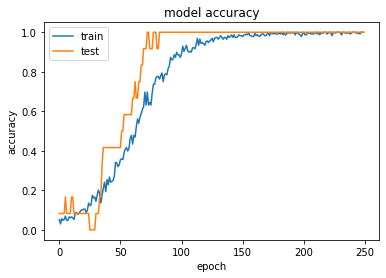

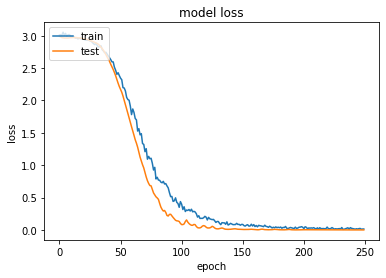

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy') #title of the model accuracy
plt.ylabel('accuracy') #yaxis of accuracy curve
plt.xlabel('epoch') #number of epoch on the xaxis
plt.legend(['train', 'test'], loc='upper left') #showing legend
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss') #title of the model loss
plt.ylabel('loss')  #yaxis of model loss
plt.xlabel('epoch') #number of epoch on the xaxis
plt.legend(['train', 'test'], loc='upper left') #showing legend
plt.show()

# step 8

Plot Confusion Matrix

accuracy : 
0.9375
Confusion matrix, without normalization
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
Confusion matrix, without normalization


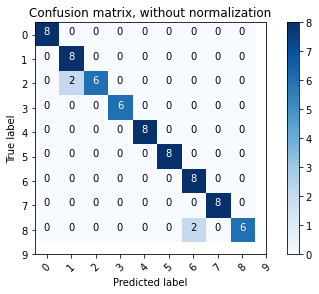

Confusion matrix, without normalization


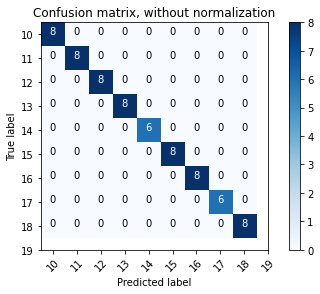

Confusion matrix:
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1

In [ ]:
predicted =np.array( cnn_model.predict(x_test))
#print(predicted)
#print(y_test)
ynew = np.argmax(cnn_model.predict(x_test), axis=-1)

#calculating accuracy score
Acc=accuracy_score(y_test, ynew)
print("accuracy : ")
print(Acc)
#/tn, fp, fn, tp = confusion_matrix(np.array(y_test), ynew).ravel()
cnf_matrix=confusion_matrix(np.array(y_test), ynew) #calculating confusin matrix

y_test1 = np_utils.to_categorical(y_test, 20)  # Converts a class vector (integers) to binary class matrix


#function for ploting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
#ploting confusion matrix
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')

plt.figure()
#ploting confusion matrix
plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')
#printing the confusion matrix and classification report
print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), ynew))
print(classification_report(np.array(y_test), ynew))